# DATA572: Supervised Learning - Project

## Project Overview

The objective of this project is to develop a small yet performant machine learning model to predict the survival of passengers aboard the Titanic. Emphasis is placed on building an efficient solution that balances high predictive accuracy with model simplicity. We explore and evaluate three distinct supervised learning algorithms, alongside a state-of-the-art deep learning method (transformer), to identify the most effective approach.

Team Members

Member 1: Mohammad Zaed Iqbal Khan

Member 2: Manpreet Singh

Member 3: Yihang Wang

# Data Preprocessing : Zaed

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_augmented.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


In [55]:
# Summary stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,name_length,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,200.00000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208,1.904602,0.602694,1.787879,17.789001,1.572536,50.49000,5.108118e+07,536369.988777,4.956762,4.067340
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,9.281607,1.613459,0.489615,1.361142,21.218127,1.661773,35.39497,2.838174e+07,261551.630299,2.915177,1.168866
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,9.249000e+04,102869.000000,0.046320,3.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,1.000000,0.000000,1.000000,7.762500,0.116026,22.00000,2.831962e+07,299638.000000,2.325861,3.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000,1.000000,1.000000,1.000000,8.850000,1.175795,43.00000,5.128853e+07,535564.000000,4.954913,4.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,2.000000,1.000000,2.000000,24.288000,2.543045,77.25000,7.493131e+07,757663.000000,7.479345,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000,11.000000,1.000000,7.000000,221.779000,9.779559,148.00000,9.997588e+07,999684.000000,9.997177,14.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  name_length        891 non-null    int64  
 13  title              891 non-null    object 
 14  title_group        891 non-null    object 
 15  family_size        891 non-null    int64  
 16  is_alone           891 non

## Exploratory Data Analysis (EDA)
Visualizing relationships before cleaning.


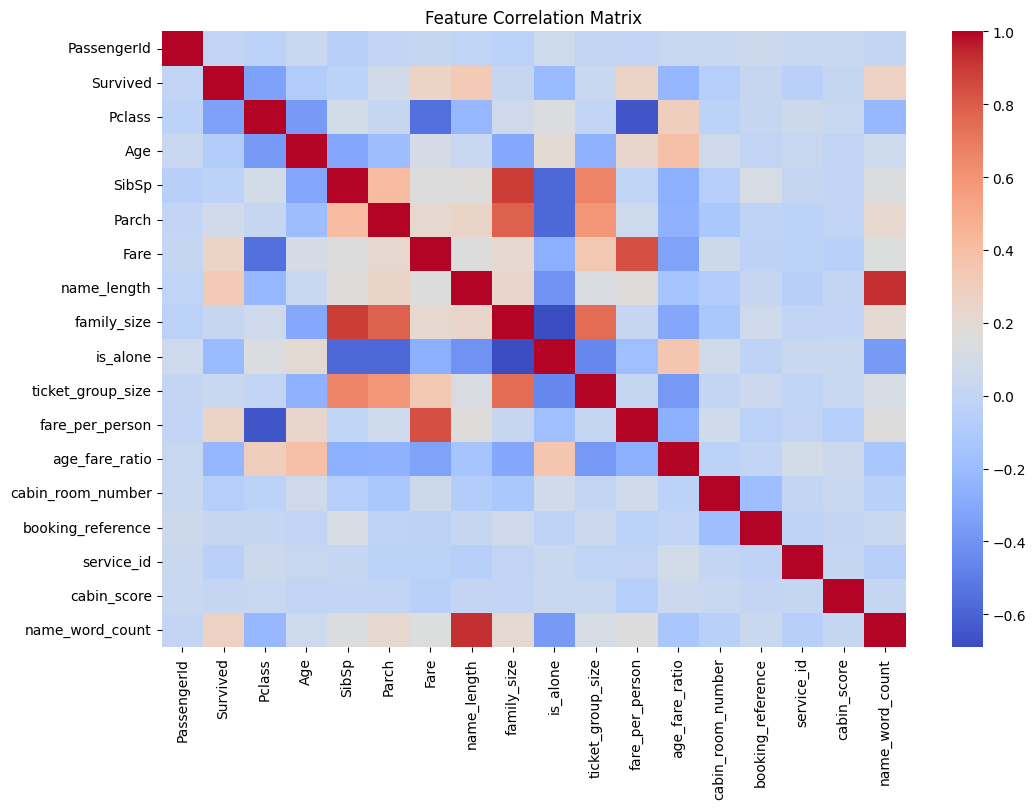

In [57]:
# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


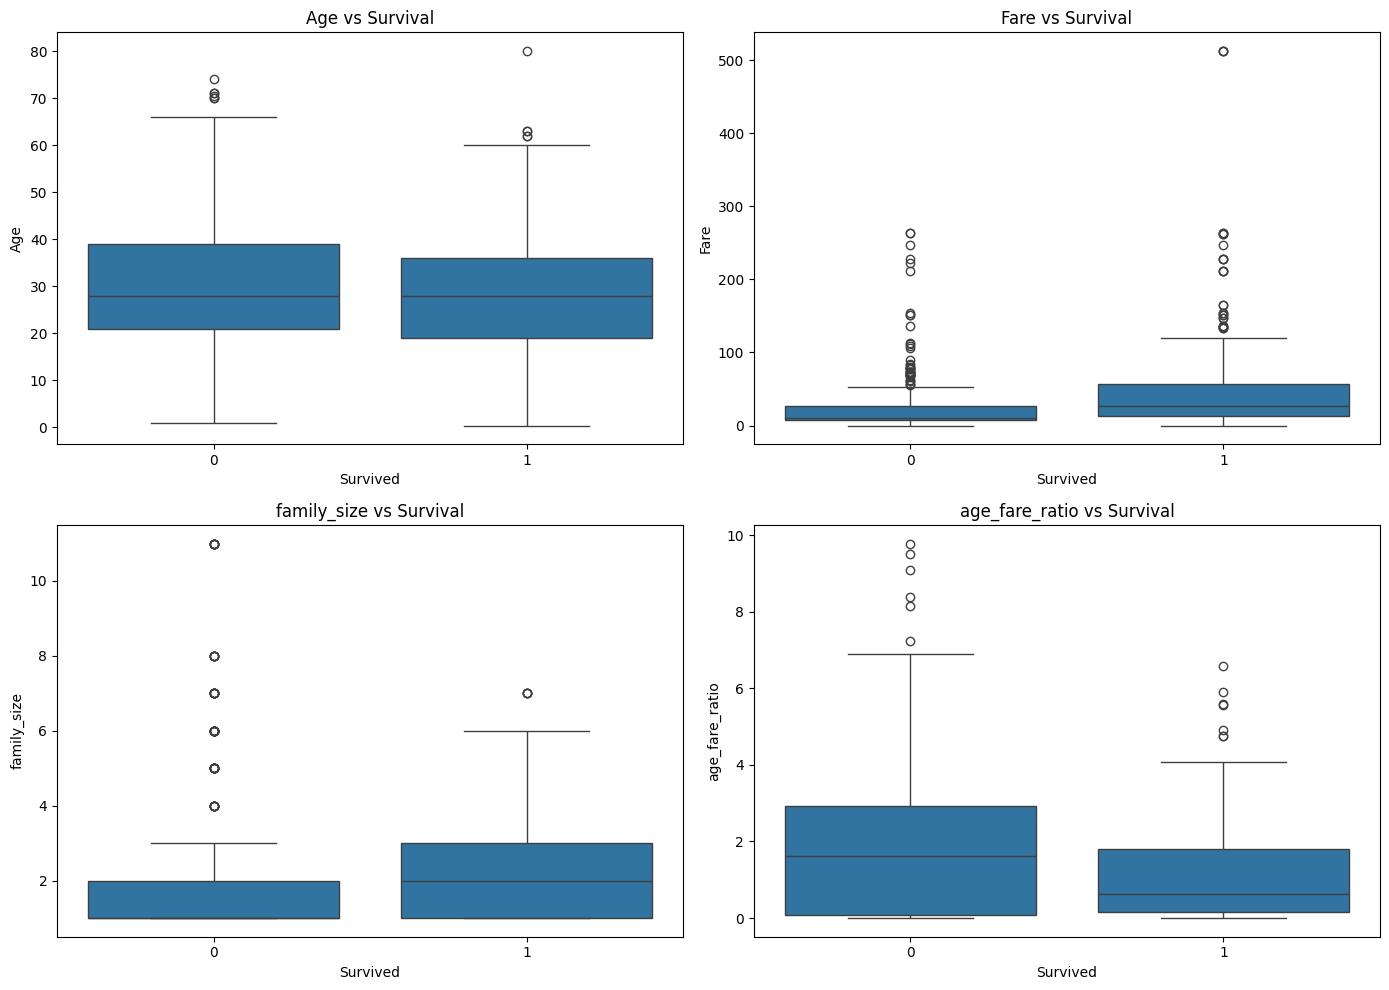

In [58]:
# Numerical Features vs Survival
num_features = ['Age', 'Fare', 'family_size', 'age_fare_ratio']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x='Survived', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Survival')

plt.tight_layout()
plt.show()


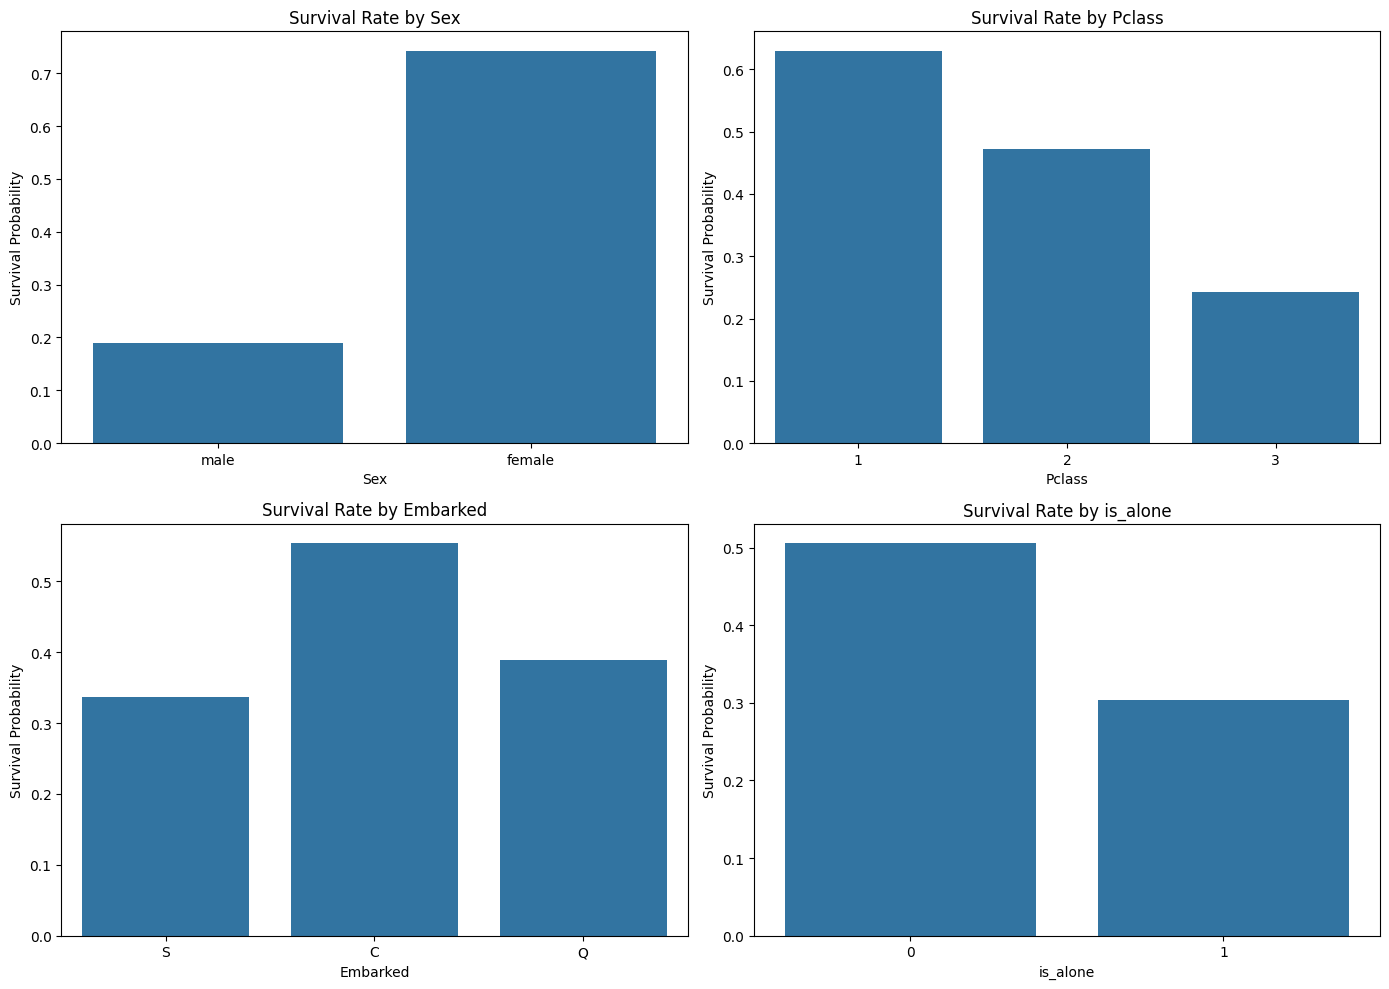

In [59]:
# Categorical Features vs Survival
cat_features = ['Sex', 'Pclass', 'Embarked', 'is_alone']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.barplot(x=col, y='Survived', data=df, ax=axes[i], estimator=np.mean, errorbar=None)
    axes[i].set_title(f'Survival Rate by {col}')
    axes[i].set_ylabel('Survival Probability')

plt.tight_layout()
plt.show()


Cabin and cabin_room_number have ~600 null values, we will drop these columns.

In [60]:
cols_to_drop = ['Cabin', 'cabin_room_number']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           889 non-null    object 
 11  name_length        891 non-null    int64  
 12  title              891 non-null    object 
 13  title_group        891 non-null    object 
 14  family_size        891 non-null    int64  
 15  is_alone           891 non-null    int64  
 16  ticket_group_size  891 non

We have null values in Age and Embarked. We will impute the missing age values with the median, to avoid
affect of outliers (too young or too old). This will be done after splitting the dataset into
train and test to avoid data leakage. We will impute the missing Embarked values with the 
mode as there are only two missing values.

In [61]:
# Replace null values in Embarked with mode
mode_val = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_val)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           891 non-null    object 
 11  name_length        891 non-null    int64  
 12  title              891 non-null    object 
 13  title_group        891 non-null    object 
 14  family_size        891 non-null    int64  
 15  is_alone           891 non-null    int64  
 16  ticket_group_size  891 non

The following columns are abritrary and have no contextual affect on survival:

PassengerId, Name, Ticket, name_length, booking_reference, service_id, name_word_count

title and title_group seem arbitrary as their classification can be derived from Sex and Age.

Upon inspection, most of the values in cabin_deck are Unknown.

Thus, the following columns will be dropped:

PassengerId, Name, Ticket, name_length, booking_reference, service_id, name_word_count, title, title_group, cabin_deck

In [62]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'name_length', 'booking_reference', 
                'service_id', 'name_word_count', 'title', 'title_group', 'cabin_deck']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    object 
 3   Age                714 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Fare               891 non-null    float64
 7   Embarked           891 non-null    object 
 8   family_size        891 non-null    int64  
 9   is_alone           891 non-null    int64  
 10  ticket_group_size  891 non-null    int64  
 11  fare_per_person    891 non-null    float64
 12  age_fare_ratio     891 non-null    float64
 13  cabin_score        891 non-null    float64
dtypes: float64(5), int64(7), object(2)
memory usage: 97.6+ KB


In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score
0,0,3,male,22.0,1,0,7.2500,S,2,0,1,7.250,3.034483,6.134152
1,1,1,female,38.0,1,0,71.2833,C,2,0,1,71.283,0.533084,4.182430
2,1,3,female,26.0,0,0,7.9250,S,1,1,1,7.925,3.280757,9.327285
3,1,1,female,35.0,1,0,53.1000,S,2,0,2,26.550,0.659134,8.660639
4,0,3,male,35.0,0,0,8.0500,S,1,1,1,8.050,4.347826,0.452187


Sex and Embarked are categorical variables, we will encode them as numeric variables.

Pclass is numeric but it represents categories so we will encode them too.

In [64]:
# For sex, we will use a simple mapping
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score
0,0,3,1,22.0,1,0,7.2500,S,2,0,1,7.250,3.034483,6.134152
1,1,1,0,38.0,1,0,71.2833,C,2,0,1,71.283,0.533084,4.182430
2,1,3,0,26.0,0,0,7.9250,S,1,1,1,7.925,3.280757,9.327285
3,1,1,0,35.0,1,0,53.1000,S,2,0,2,26.550,0.659134,8.660639
4,0,3,1,35.0,0,0,8.0500,S,1,1,1,8.050,4.347826,0.452187


In [65]:
# We will do One Hot Encoding for non-binary categorical variable

from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Embarked', 'Pclass']

encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

X_categorical = df[categorical_features]
encoded_data = encoder.fit_transform(X_categorical)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

print(encoded_df.head())

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3
0         0.0         0.0         1.0       0.0       0.0       1.0
1         1.0         0.0         0.0       1.0       0.0       0.0
2         0.0         0.0         1.0       0.0       0.0       1.0
3         0.0         0.0         1.0       1.0       0.0       0.0
4         0.0         0.0         1.0       0.0       0.0       1.0


In [66]:
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,2,0,1,7.250,3.034483,6.134152,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,2,0,1,71.283,0.533084,4.182430,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,26.0,0,0,7.9250,1,1,1,7.925,3.280757,9.327285,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,2,0,2,26.550,0.659134,8.660639,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,35.0,0,0,8.0500,1,1,1,8.050,4.347826,0.452187,0.0,0.0,1.0,0.0,0.0,1.0


In [67]:
print(df['ticket_group_size'].value_counts())

ticket_group_size
1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: count, dtype: int64


Fare and age_fare_ratio have high multicollinearity with fare_per_person and age as they
are calculated from them.

Also, SibSP, Parch, and family_size have perfect multicollinearity - upon inspection it was
found that family_size = SibSp + Parch + 1.

So we remove the following columns to reduce multicollinearity:

Fare, age_fare_ratio, SibSp, Parch

In [68]:
# To avoid multicollinearity we drop Fare and age_fare_ratio
df = df.drop(columns=['Fare', 'age_fare_ratio', 'SibSp', 'Parch'])
df.head()

,Survived,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,2,0,1,7.250,6.134152,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,38.0,2,0,1,71.283,4.182430,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,26.0,1,1,1,7.925,9.327285,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,35.0,2,0,2,26.550,8.660639,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,35.0,1,1,1,8.050,0.452187,0.0,0.0,1.0,0.0,0.0,1.0


Now, we will split the dataset as we want to impute Age and scale our numerical columns, 
and prevent data leakage in the process.

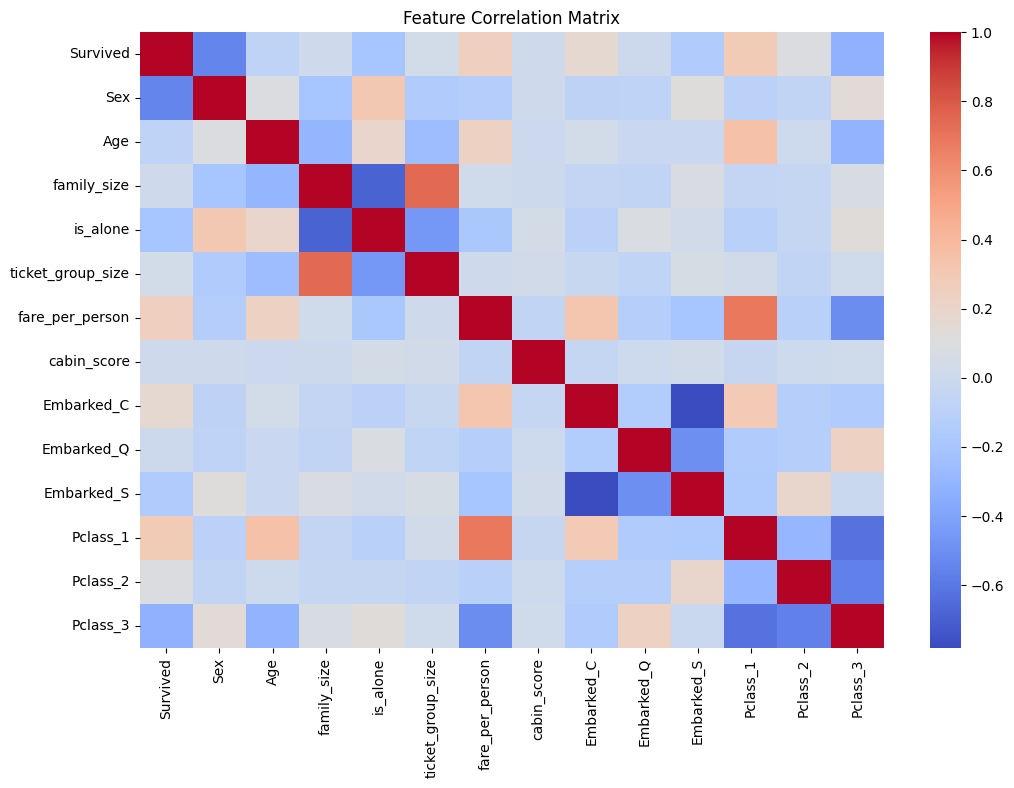

In [69]:
# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [70]:
# Separate y from x

target = 'Survived'

y = df[target]
X = df.drop(columns=[target])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print(f"Training Data: {X_train.shape[0]} samples")
print(f"Test Data: {X_test.shape[0]} samples")

Training Data: 668 samples
Test Data: 223 samples


In [72]:
# Impute missing age values with median

median_age = X_train['Age'].median()
X_train['Age'] = X_train['Age'].fillna(median_age)
X_test['Age'] = X_test['Age'].fillna(median_age)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 486 to 821
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                668 non-null    int64  
 1   Age                668 non-null    float64
 2   family_size        668 non-null    int64  
 3   is_alone           668 non-null    int64  
 4   ticket_group_size  668 non-null    int64  
 5   fare_per_person    668 non-null    float64
 6   cabin_score        668 non-null    float64
 7   Embarked_C         668 non-null    float64
 8   Embarked_Q         668 non-null    float64
 9   Embarked_S         668 non-null    float64
 10  Pclass_1           668 non-null    float64
 11  Pclass_2           668 non-null    float64
 12  Pclass_3           668 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 73.1 KB


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 157 to 639
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                223 non-null    int64  
 1   Age                223 non-null    float64
 2   family_size        223 non-null    int64  
 3   is_alone           223 non-null    int64  
 4   ticket_group_size  223 non-null    int64  
 5   fare_per_person    223 non-null    float64
 6   cabin_score        223 non-null    float64
 7   Embarked_C         223 non-null    float64
 8   Embarked_Q         223 non-null    float64
 9   Embarked_S         223 non-null    float64
 10  Pclass_1           223 non-null    float64
 11  Pclass_2           223 non-null    float64
 12  Pclass_3           223 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 24.4 KB


In [74]:
X_train.head()

,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
486,0,35.0,2,0,2,45.000,9.173136,0.0,0.0,1.0,1.0,0.0,0.0
238,1,19.0,1,1,1,10.500,9.064721,0.0,0.0,1.0,0.0,1.0,0.0
722,1,34.0,1,1,1,13.000,2.131047,0.0,0.0,1.0,0.0,1.0,0.0
184,0,4.0,3,0,1,22.025,1.148368,0.0,0.0,1.0,0.0,0.0,1.0
56,0,21.0,1,1,1,10.500,3.922440,0.0,0.0,1.0,0.0,1.0,0.0


We will now scale the following columns to prevent imbalance:

Age, family_size, ticket_group_size, fare_per_person, cabin_score

In [75]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'family_size', 'ticket_group_size', 'fare_per_person', 'cabin_score']

scaler = StandardScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_train.head()

,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
486,0,0.405333,0.105501,0,0.183190,1.338548,1.441830,0.0,0.0,1.0,1.0,0.0,0.0
238,1,-0.829764,-0.553139,1,-0.572186,-0.339200,1.404873,0.0,0.0,1.0,0.0,1.0,0.0
722,1,0.328140,-0.553139,1,-0.572186,-0.217624,-0.958719,0.0,0.0,1.0,0.0,1.0,0.0
184,0,-1.987668,0.764140,0,-0.572186,0.221265,-1.293701,0.0,0.0,1.0,0.0,0.0,1.0
56,0,-0.675377,-0.553139,1,-0.572186,-0.339200,-0.348058,0.0,0.0,1.0,0.0,1.0,0.0


In [76]:
X_test.head()

,Sex,Age,family_size,is_alone,ticket_group_size,fare_per_person,cabin_score,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
157,1,0.019365,-0.553139,1,-0.572186,-0.458345,-1.137423,0.0,0.0,1.0,0.0,0.0,1.0
501,0,-0.675377,-0.553139,1,-0.572186,-0.472934,1.681658,0.0,1.0,0.0,0.0,0.0,1.0
352,1,-1.138538,0.764140,0,-0.572186,-0.498270,0.102409,1.0,0.0,0.0,0.0,0.0,1.0
82,0,-0.057828,-0.553139,1,-0.572186,-0.471086,-1.065160,0.0,1.0,0.0,0.0,0.0,1.0
683,1,-1.215732,4.057335,0,3.204693,-0.469676,0.431451,0.0,0.0,1.0,0.0,0.0,1.0


In [77]:
y_train

486    1
238    0
722    0
184    1
56     1
      ..
547    1
469    1
736    0
462    0
821    1
Name: Survived, Length: 668, dtype: int64

In [78]:
y_test

157    0
501    0
352    0
82     1
683    0
      ..
259    1
91     0
341    1
115    0
639    0
Name: Survived, Length: 223, dtype: int64

# Data Modelling : Manpreet Singh

### Model Building and Training

### 1) Logistic Regression

The code snippet initiates the model-building phase by establishing a Logistic Regression baseline. Setting max_iter=1000 is a deliberate choice to ensure the solver converges, preventing the common optimization warnings that occur with default settings on complex datasets. By evaluating performance on the training set via a classification report and a Confusion Matrix, we gain an immediate diagnostic look at the model's ability to capture the underlying patterns in the data.

Baseline Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       412
           1       0.78      0.71      0.74       256

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668



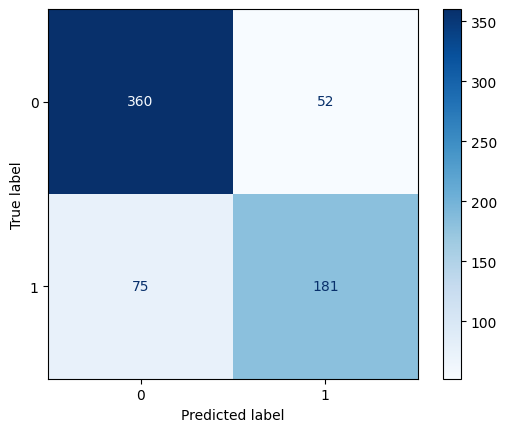

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay,f1_score

# Create baseline model
log_baseline = LogisticRegression(max_iter=1000, random_state=42)
log_baseline.fit(X_train, y_train)

# Evaluate on Training Set
baseline_preds = log_baseline.predict(X_train)

print("Baseline Logistic Regression")
print(classification_report(y_train, baseline_preds))

# Plot Baseline Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, baseline_preds, cmap='Blues')

To move beyond the baseline, this block employs GridSearchCV to systematically explore the model's hyperparameter space. The primary focus is the parameter C, which controls the inverse regularization strength; by testing values across four orders of magnitude (from 0.01 to 100), we can find the optimal balance between underfitting and overfitting.

The use of 5-fold cross-validation (cv=5) is a crucial strategy here - it ensures that our choice of "best" parameters isn't just a fluke of a specific data split, but a robust configuration that performs consistently across different subsets of the training data. By setting refit=True, the model automatically retrains on the entire training set using the best found parameters, maximizing the learning potential before final evaluation.

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, s

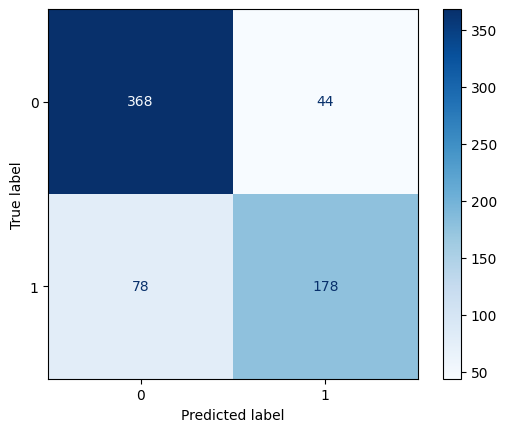

In [80]:
# Tune model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Grid search for best parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'] 
}

logreg_grid = GridSearchCV(log_model, param_grid, refit=True, verbose=2, cv=5)
logreg_grid.fit(X_train, y_train)

print("Best Parameters:", logreg_grid.best_params_)

# Predict on the training set using the best parameters found
logreg_train_predictions = logreg_grid.predict(X_train)

print("Training Set Classification Report")
print(classification_report(y_train, logreg_train_predictions))

# Plot confusion matrix for the training set
ConfusionMatrixDisplay.from_predictions(
    y_train, 
    logreg_train_predictions, 
    cmap='Blues'
)


This code moves to strategic dimensionality reduction. By extracting the absolute values of the coef_ attributes, the code identifies which features hold the most weight in the model's decision-making process. Applying a threshold of 0.05 serves as a noise-filtering mechanism, effectively pruning features that contribute marginal predictive power. This choice is crucial for improving model interpretability and reducing the risk of overfitting by focusing only on the most influential signals.

Reduced from 13 features to 12 features.
Selected Features: ['Sex', 'Pclass_3', 'Pclass_1', 'is_alone', 'Age', 'Embarked_S', 'fare_per_person', 'family_size', 'Embarked_Q', 'cabin_score', 'Embarked_C', 'Pclass_2']
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.

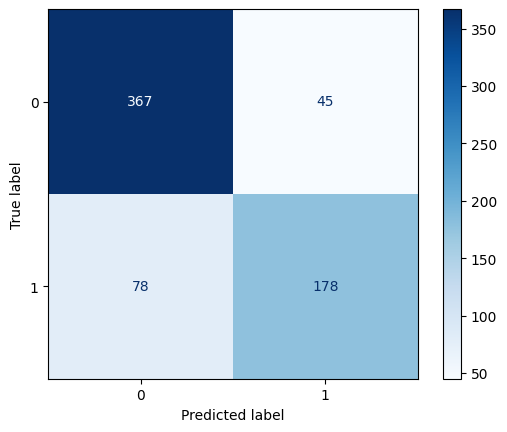

In [81]:
# Create the feature importance DataFrame using Coefficients
best_logreg = logreg_grid.best_estimator_
importance_values = np.abs(best_logreg.coef_[0])

feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

# Feature Reduction: Select features with absolute coefficient > 0.05
important_features_lr = feature_importance_lr[
    feature_importance_lr['Importance'] > 0.05
]['Feature'].tolist()

print(f"Reduced from {X_train.shape[1]} features to {len(important_features_lr)} features.")
print("Selected Features:", important_features_lr)

# Create reduced datasets
X_train_reduced_lr = X_train[important_features_lr]
X_test_reduced_lr = X_test[important_features_lr]

# Retraining Logistic Regression with Reduced Features
log_model_reduced = LogisticRegression(max_iter=1000, random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'] 
}

logreg_grid_reduced = GridSearchCV(log_model_reduced, param_grid_lr, refit=True, verbose=2, cv=5)
logreg_grid_reduced.fit(X_train_reduced_lr, y_train)

print("\nBest Parameters (Reduced LogReg):", logreg_grid_reduced.best_params_)

# Evaluate on Training Set
logreg_reduced_train_preds = logreg_grid_reduced.predict(X_train_reduced_lr)
print("Training Set Classification Report - Reduced")
print(classification_report(y_train, logreg_reduced_train_preds))

# 6. Plot Confusion Matrix for Training Set
ConfusionMatrixDisplay.from_predictions(
    y_train, 
    logreg_reduced_train_preds, 
    cmap='Blues'
)

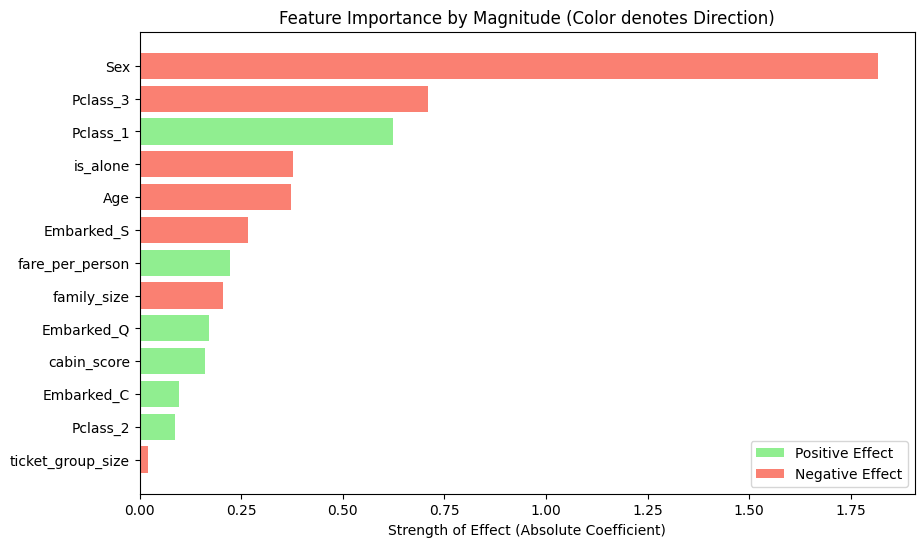

In [82]:
# Create a DataFrame to hold both magnitude and actual value
df_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_logreg.coef_[0],
    'Magnitude': np.abs(best_logreg.coef_[0])
}).sort_values(by='Magnitude', ascending=True)

# Create colors based on direction (Red for negative, Green for positive)
colors = ['salmon' if c < 0 else 'lightgreen' for c in df_importance['Coefficient']]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Magnitude'], color=colors)
plt.title('Feature Importance by Magnitude (Color denotes Direction)')
plt.xlabel('Strength of Effect (Absolute Coefficient)')

# Add a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgreen', label='Positive Effect'),
                   Patch(facecolor='salmon', label='Negative Effect')]
plt.legend(handles=legend_elements)

plt.show()

### 2) Random Forest 

Baseline Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       256

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



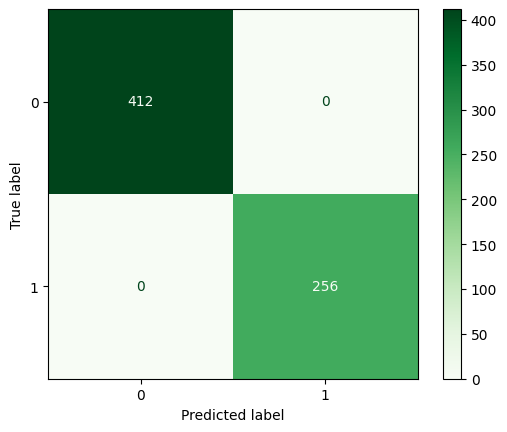

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create baseline model
rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_baseline.fit(X_train, y_train)

# Evaluate on Training Set
rf_baseline_preds = rf_baseline.predict(X_train)

print("Baseline Random Forest")
print(classification_report(y_train, rf_baseline_preds))

# Plot Baseline Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_train,
    rf_baseline_preds,
    cmap='Greens'
)

#### Hyperparameter Tuning – Random Forest

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training Set Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       412
           1       0.96      0.88      0.92       256

    accuracy                           0.94       668
   macro avg       0.94      0.93      0.93       668
weighted avg       0.94      0.94      0.94       668



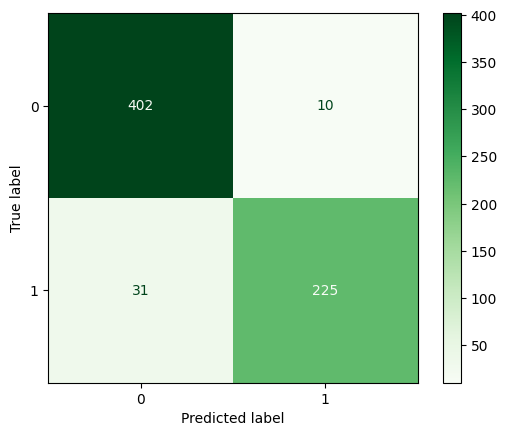

In [84]:
# Tune model
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    rf_model,
    param_grid_rf,
    cv=5,
    verbose=2,
    n_jobs=-1,
    refit=True
)

rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)

# Training set evaluation
rf_train_preds = rf_grid.predict(X_train)

print("Training Set Classification Report")
print(classification_report(y_train, rf_train_preds))

ConfusionMatrixDisplay.from_predictions(
    y_train,
    rf_train_preds,
    cmap='Greens'
)


#### Feature Importance – Random Forest

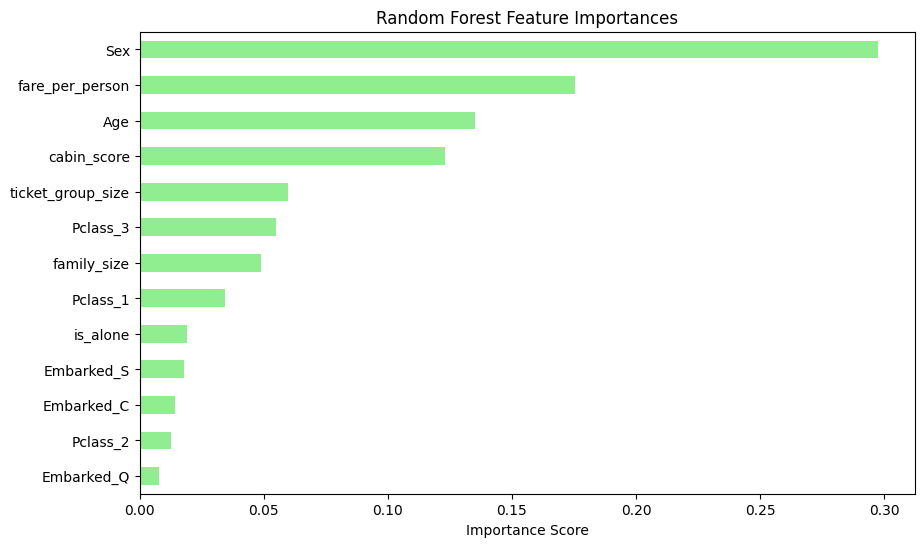

In [85]:
# Get best estimator
best_rf = rf_grid.best_estimator_

# Feature importance
rf_importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
rf_importances.plot(kind='barh', color='lightgreen')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.show()

#### Feature Reduction & Retraining – Random Forest

Reduced from 13 features to 12 features.
Selected Features: ['Sex', 'fare_per_person', 'Age', 'cabin_score', 'ticket_group_size', 'Pclass_3', 'family_size', 'Pclass_1', 'is_alone', 'Embarked_S', 'Embarked_C', 'Pclass_2']
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (Reduced RF): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training Set Classification Report - Reduced
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       412
           1       0.96      0.89      0.92       256

    accuracy                           0.94       668
   macro avg       0.95      0.93      0.94       668
weighted avg       0.95      0.94      0.94       668



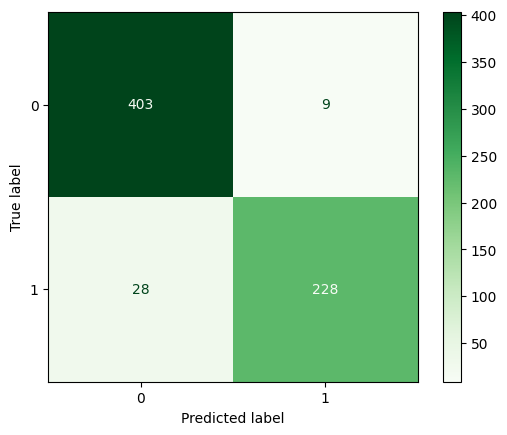

In [86]:
# Create feature importance DataFrame
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select important features
important_features_rf = feature_importance_rf[
    feature_importance_rf['Importance'] > 0.01
]['Feature'].tolist()

print(f"Reduced from {X_train.shape[1]} features to {len(important_features_rf)} features.")
print("Selected Features:", important_features_rf)

# Reduced datasets
X_train_reduced_rf = X_train[important_features_rf]
X_test_reduced_rf = X_test[important_features_rf]

# Retrain RF with reduced features
rf_model_reduced = RandomForestClassifier(random_state=42)

rf_grid_reduced = GridSearchCV(
    rf_model_reduced,
    param_grid_rf,
    cv=5,
    verbose=2,
    n_jobs=-1,
    refit=True
)

rf_grid_reduced.fit(X_train_reduced_rf, y_train)

print("Best Parameters (Reduced RF):", rf_grid_reduced.best_params_)

rf_reduced_preds = rf_grid_reduced.predict(X_train_reduced_rf)

print("Training Set Classification Report - Reduced")
print(classification_report(y_train, rf_reduced_preds))

ConfusionMatrixDisplay.from_predictions(
    y_train,
    rf_reduced_preds,
    cmap='Greens'
)


### 3) KNN

Baseline KNN
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       412
           1       0.86      0.80      0.83       256

    accuracy                           0.87       668
   macro avg       0.87      0.86      0.87       668
weighted avg       0.87      0.87      0.87       668



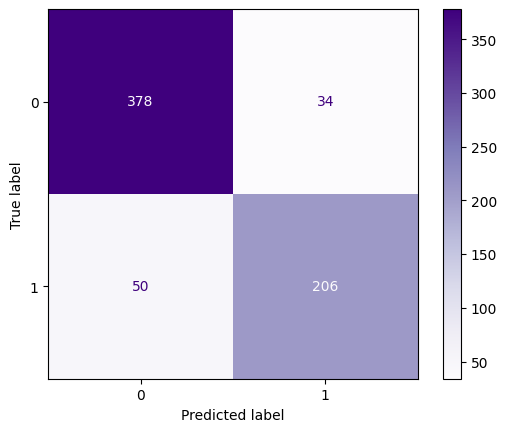

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create pipeline
knn_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_baseline.fit(X_train, y_train)

# Evaluate on Training Set
knn_baseline_preds = knn_baseline.predict(X_train)

print("Baseline KNN")
print(classification_report(y_train, knn_baseline_preds))

ConfusionMatrixDisplay.from_predictions(
    y_train,
    knn_baseline_preds,
    cmap='Purples'
)


#### Hyperparameter Tuning – KNN

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV

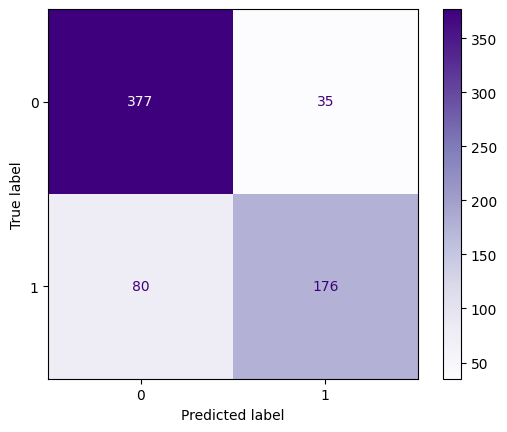

In [88]:
# Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    knn_pipeline,
    param_grid_knn,
    cv=5,
    verbose=2,
    refit=True
)

knn_grid.fit(X_train, y_train)

print("Best Parameters:", knn_grid.best_params_)

knn_train_preds = knn_grid.predict(X_train)

print("Training Set Classification Report")
print(classification_report(y_train, knn_train_preds))

ConfusionMatrixDisplay.from_predictions(
    y_train,
    knn_train_preds,
    cmap='Purples'
)


### 4) Transformer

#### Model Building

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler

class TransformerClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim=None, d_model=64, nhead=4, num_layers=2, 
                 dropout=0.1, epochs=50, lr=0.001, batch_size=32, random_state=42):
        self.input_dim = input_dim
        self.d_model = d_model
        self.nhead = nhead
        self.num_layers = num_layers
        self.dropout = dropout
        self.epochs = epochs
        self.lr = lr
        self.batch_size = batch_size
        self.random_state = random_state
        self.model_ = None
        self.scaler_ = StandardScaler()
        self.device_ = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def _build_model(self):
        class TransformerNet(nn.Module):
            def __init__(self, input_dim, d_model, nhead, num_layers, dropout):
                super().__init__()
                self.embedding = nn.Linear(input_dim, d_model)
                encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
                self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
                self.fc = nn.Linear(d_model, 1)
                self.sigmoid = nn.Sigmoid()

            def forward(self, x):
                # Project input [batch, features] -> [batch, features, d_model]? 
                # Simplified approach for tabular: Project [batch, features] -> [batch, 1, d_model] -> Attention
                x = self.embedding(x).unsqueeze(1) 
                x = self.transformer(x)
                x = x.mean(dim=1) # Pooling
                return self.sigmoid(self.fc(x))
        
        torch.manual_seed(self.random_state)
        return TransformerNet(self.input_dim, self.d_model, self.nhead, self.num_layers, self.dropout).to(self.device_)

    def fit(self, X, y):
        # Scale data for Neural Network stability
        X_scaled = self.scaler_.fit_transform(X)
        self.input_dim = X.shape[1]
        self.model_ = self._build_model()
        
        # Convert to Tensors
        X_tensor = torch.FloatTensor(X_scaled).to(self.device_)
        y_tensor = torch.FloatTensor(y.values if hasattr(y, 'values') else y).reshape(-1, 1).to(self.device_)
        
        loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=self.batch_size, shuffle=True)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)

        self.model_.train()
        for epoch in range(self.epochs):
            for xb, yb in loader:
                optimizer.zero_grad()
                outputs = self.model_(xb)
                loss = criterion(outputs, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_scaled = self.scaler_.transform(X)
        X_tensor = torch.FloatTensor(X_scaled).to(self.device_)
        with torch.no_grad():
            probs = self.model_(X_tensor)
        return (probs.cpu().numpy() > 0.5).astype(int).flatten()

Baseline Transformer Model
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       412
           1       0.91      0.82      0.86       256

    accuracy                           0.90       668
   macro avg       0.90      0.88      0.89       668
weighted avg       0.90      0.90      0.90       668



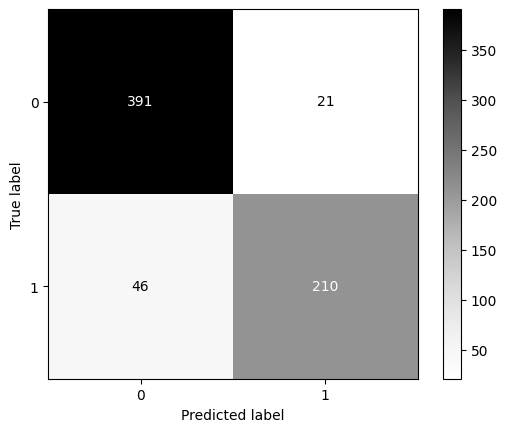

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay,f1_score

# Create baseline Transformer model
# Note: input_dim will be inferred during fit
trans_baseline = TransformerClassifier(
    d_model=32, nhead=2, num_layers=1, epochs=50, random_state=42
)
trans_baseline.fit(X_train, y_train)

# Evaluate on Training Set
baseline_preds = trans_baseline.predict(X_train)

print("Baseline Transformer Model")
print(classification_report(y_train, baseline_preds))

# Plot Baseline Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, baseline_preds, cmap='Greys')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ....d_model=32, dropout=0.1, lr=0.001, num_layers=1; total time=   1.4s
[CV] END ....d_model=32, dropout=0.1, lr=0.001, num_layers=1; total time=   1.4s
[CV] END ....d_model=32, dropout=0.1, lr=0.001, num_layers=1; total time=   1.5s
[CV] END ....d_model=32, dropout=0.1, lr=0.001, num_layers=2; total time=   3.0s
[CV] END ....d_model=32, dropout=0.1, lr=0.001, num_layers=2; total time=   3.0s
[CV] END ....d_model=32, dropout=0.1, lr=0.001, num_layers=2; total time=   3.0s
[CV] END .....d_model=32, dropout=0.1, lr=0.01, num_layers=1; total time=   1.8s
[CV] END .....d_model=32, dropout=0.1, lr=0.01, num_layers=1; total time=   1.8s
[CV] END .....d_model=32, dropout=0.1, lr=0.01, num_layers=1; total time=   1.7s
[CV] END .....d_model=32, dropout=0.1, lr=0.01, num_layers=2; total time=   2.9s
[CV] END .....d_model=32, dropout=0.1, lr=0.01, num_layers=2; total time=   2.8s
[CV] END .....d_model=32, dropout=0.1, lr=0.01, 

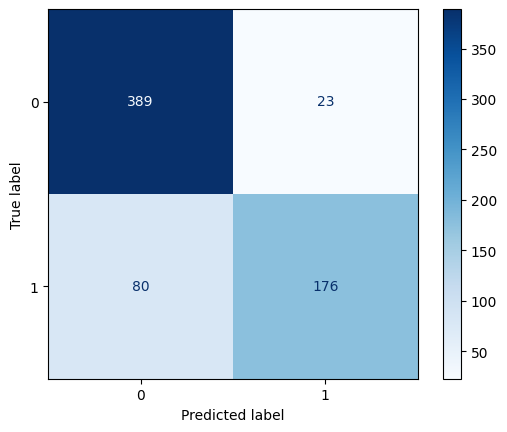

In [91]:
# Grid search for best parameters
# We tune 'd_model' (capacity) and 'dropout' (regularization)
param_grid = {
    'd_model': [32, 64],
    'num_layers': [1, 2],
    'dropout': [0.1, 0.3],
    'lr': [0.001, 0.01]
}

trans_grid = GridSearchCV(
    TransformerClassifier(epochs=50, random_state=42), # epochs fixed for speed
    param_grid, 
    refit=True, 
    verbose=2, 
    cv=3 # Reduced CV for speed with Neural Nets
)
trans_grid.fit(X_train, y_train)

print("Best Parameters:", trans_grid.best_params_)

# Predict using the best parameters found
trans_train_predictions = trans_grid.predict(X_train)

print("Training Set Classification Report (Tuned)")
print(classification_report(y_train, trans_train_predictions))

ConfusionMatrixDisplay.from_predictions(
    y_train, 
    trans_train_predictions, 
    cmap='Blues'
)

Reduced from 13 features to 5 features.
Selected Features: ['Sex', 'Age', 'ticket_group_size', 'Pclass_3', 'Pclass_1']
Training Set Classification Report - Reduced
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       412
           1       0.87      0.68      0.76       256

    accuracy                           0.84       668
   macro avg       0.85      0.81      0.82       668
weighted avg       0.84      0.84      0.83       668



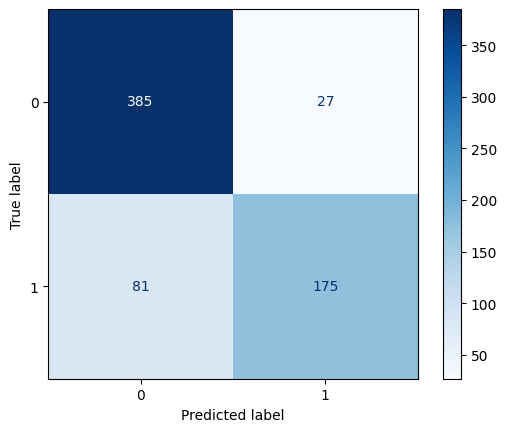

In [92]:
from sklearn.inspection import permutation_importance

# Feature Selection via Permutation Importance
best_trans = trans_grid.best_estimator_

# Calculate importance (this may take a moment)
result = permutation_importance(
    best_trans, X_train, y_train, n_repeats=10, random_state=42
)

# Create DataFrame
feature_importance_trans = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Select features with Importance > Threshold (adjusted for permutation scale)
# Note: Threshold is lower here as permutation importance values are often small
important_features_trans = feature_importance_trans[
    feature_importance_trans['Importance'] > 0.005 
]['Feature'].tolist()

print(f"Reduced from {X_train.shape[1]} features to {len(important_features_trans)} features.")
print("Selected Features:", important_features_trans)

# Create reduced datasets
X_train_reduced_trans = X_train[important_features_trans]
X_test_reduced_trans = X_test[important_features_trans]

# Retraining Transformer with Reduced Features
trans_model_reduced = TransformerClassifier(
    epochs=50, random_state=42, 
    **trans_grid.best_params_ # Reuse best params found earlier
)

trans_model_reduced.fit(X_train_reduced_trans, y_train)

# Evaluate
trans_reduced_preds = trans_model_reduced.predict(X_train_reduced_trans)
print("Training Set Classification Report - Reduced")
print(classification_report(y_train, trans_reduced_preds))

ConfusionMatrixDisplay.from_predictions(
    y_train, 
    trans_reduced_preds, 
    cmap='Blues'
)

# Data Analysis : Yihang

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

In [94]:
lr_base = log_baseline
lr_full = logreg_grid.best_estimator_
lr_red = logreg_grid_reduced.best_estimator_

rf_full = rf_grid.best_estimator_
rf_red = rf_grid_reduced.best_estimator_

knn_best = knn_grid.best_estimator_

## Logistic Regression (Baseline)

Logistic Regression (Baseline) Accuracy: 0.7982062780269058
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       137
           1       0.75      0.72      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



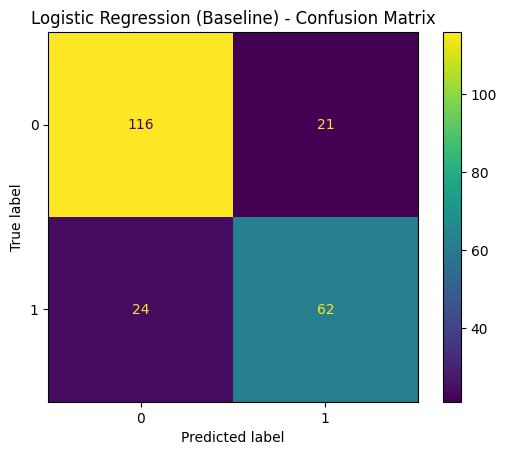

In [95]:
y_pred_lr_base = lr_base.predict(X_test)

print("Logistic Regression (Baseline) Accuracy:", accuracy_score(y_test, y_pred_lr_base))
print(classification_report(y_test, y_pred_lr_base))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_base)
plt.title("Logistic Regression (Baseline) - Confusion Matrix")
plt.show()

Interpretation: Baseline Logistic Regression is a simple and interpretable reference for test-set performance.

## Logistic Regression (Tuned, Full Features)

Logistic Regression (Tuned, Full) Accuracy: 0.7802690582959642
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       137
           1       0.74      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



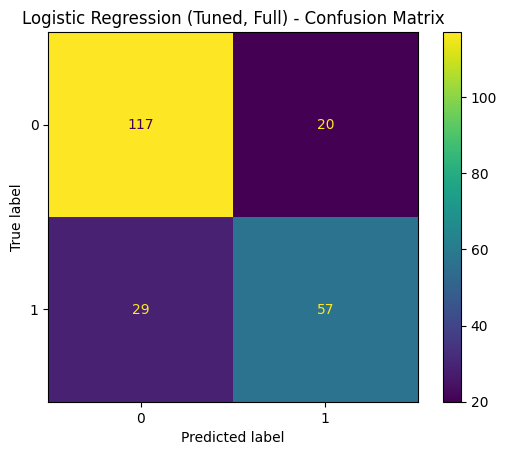

In [96]:
y_pred_lr_full = lr_full.predict(X_test)

print("Logistic Regression (Tuned, Full) Accuracy:", accuracy_score(y_test, y_pred_lr_full))
print(classification_report(y_test, y_pred_lr_full))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_full)
plt.title("Logistic Regression (Tuned, Full) - Confusion Matrix")
plt.show()

Interpretation: Tuning improves Logistic Regression by selecting a better regularization strength.

## Logistic Regression (Tuned, Reduced Features)

Logistic Regression (Tuned, Reduced) Accuracy: 0.7802690582959642
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       137
           1       0.74      0.66      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



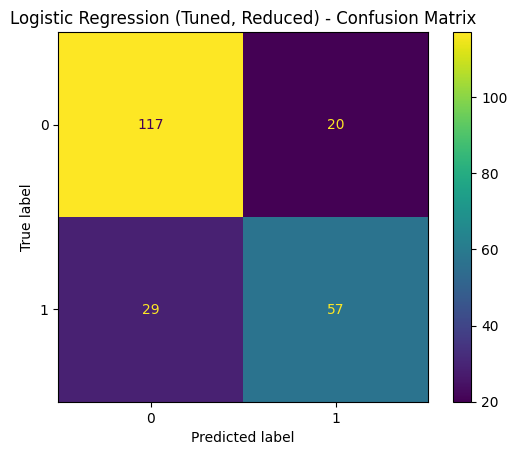

In [97]:
y_pred_lr_red = lr_red.predict(X_test_reduced_lr)

print("Logistic Regression (Tuned, Reduced) Accuracy:", accuracy_score(y_test, y_pred_lr_red))
print(classification_report(y_test, y_pred_lr_red))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_red)
plt.title("Logistic Regression (Tuned, Reduced) - Confusion Matrix")
plt.show()

Interpretation: The reduced-feature Logistic Regression aims to keep similar performance with fewer predictors.

## Random Forest (Tuned, Full Features)

Random Forest (Tuned, Full) Accuracy: 0.7668161434977578
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       137
           1       0.72      0.65      0.68        86

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.77      0.76       223



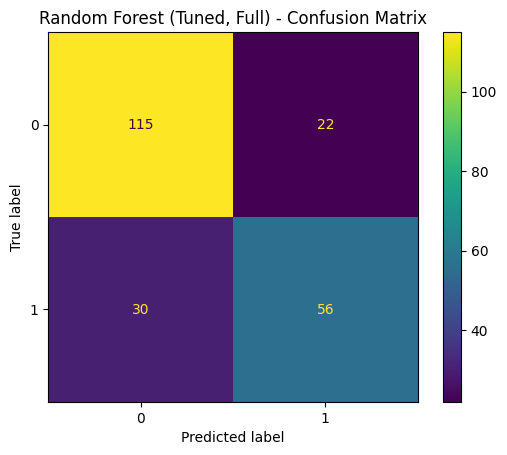

In [98]:
y_pred_rf_full = rf_full.predict(X_test)

print("Random Forest (Tuned, Full) Accuracy:", accuracy_score(y_test, y_pred_rf_full))
print(classification_report(y_test, y_pred_rf_full))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_full)
plt.title("Random Forest (Tuned, Full) - Confusion Matrix")
plt.show()

Interpretation: Tuned Random Forest captures non-linear relationships and can improve classification performance.

## Random Forest (Tuned, Reduced Features)

Random Forest (Tuned, Reduced) Accuracy: 0.7488789237668162
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       137
           1       0.70      0.62      0.65        86

    accuracy                           0.75       223
   macro avg       0.74      0.72      0.73       223
weighted avg       0.75      0.75      0.75       223



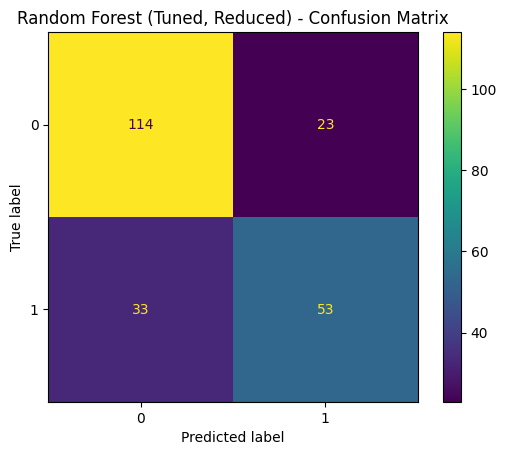

In [99]:
y_pred_rf_red = rf_red.predict(X_test_reduced_rf)

print("Random Forest (Tuned, Reduced) Accuracy:", accuracy_score(y_test, y_pred_rf_red))
print(classification_report(y_test, y_pred_rf_red))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_red)
plt.title("Random Forest (Tuned, Reduced) - Confusion Matrix")
plt.show()

Interpretation: Reduced-feature Random Forest simplifies the model while keeping performance competitive.

## KNN (Tuned)

KNN (Tuned) Accuracy: 0.8071748878923767
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.78      0.70      0.74        86

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



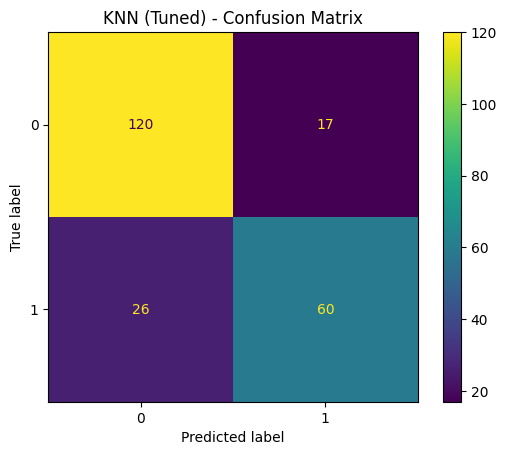

In [100]:
y_pred_knn = knn_best.predict(X_test)

print("KNN (Tuned) Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("KNN (Tuned) - Confusion Matrix")
plt.show()

Interpretation: KNN performance depends on the chosen neighborhood size and distance metric, and tuning improves selection.

## Model Comparison (Test Set)

In [101]:
summary = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Logistic Regression (Tuned, Full)",
        "Logistic Regression (Tuned, Reduced)",
        "Random Forest (Tuned, Full)",
        "Random Forest (Tuned, Reduced)",
        "KNN (Tuned)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr_base),
        accuracy_score(y_test, y_pred_lr_full),
        accuracy_score(y_test, y_pred_lr_red),
        accuracy_score(y_test, y_pred_rf_full),
        accuracy_score(y_test, y_pred_rf_red),
        accuracy_score(y_test, y_pred_knn)
    ],
    "F1 (Weighted)": [
        f1_score(y_test, y_pred_lr_base, average="weighted"),
        f1_score(y_test, y_pred_lr_full, average="weighted"),
        f1_score(y_test, y_pred_lr_red, average="weighted"),
        f1_score(y_test, y_pred_rf_full, average="weighted"),
        f1_score(y_test, y_pred_rf_red, average="weighted"),
        f1_score(y_test, y_pred_knn, average="weighted")
    ]
}).sort_values("Accuracy", ascending=False)

summary

,Model,Accuracy,F1 (Weighted)
5,KNN (Tuned),0.807175,0.804918
0,Logistic Regression (Baseline),0.798206,0.797508
1,"Logistic Regression (Tuned, Full)",0.780269,0.777697
2,"Logistic Regression (Tuned, Reduced)",0.780269,0.777697
3,"Random Forest (Tuned, Full)",0.766816,0.764436
4,"Random Forest (Tuned, Reduced)",0.748879,0.745549


## Accuracy plot

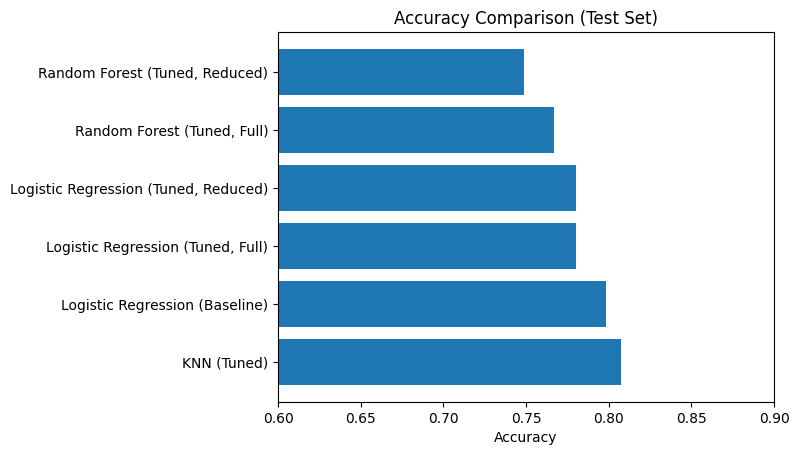

In [102]:
plt.figure()
plt.barh(summary["Model"], summary["Accuracy"])

plt.xlim(0.6, 0.9) 

plt.xlabel("Accuracy")
plt.title("Accuracy Comparison (Test Set)")
plt.show()

## F1 plot

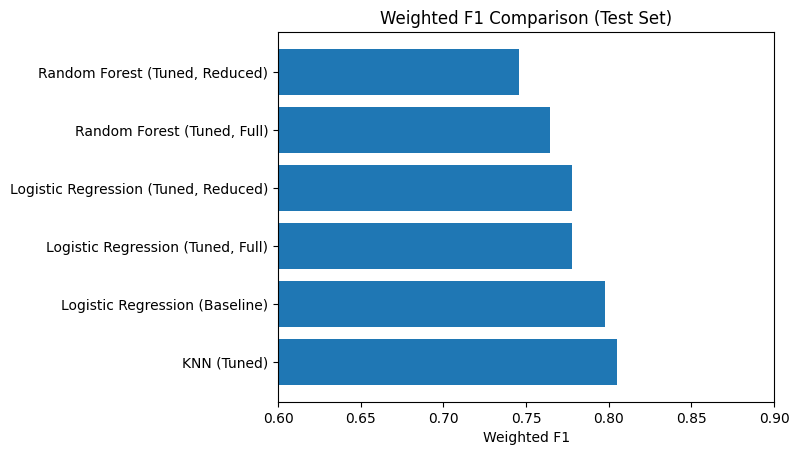

In [103]:
plt.figure()
plt.barh(summary["Model"], summary["F1 (Weighted)"])

plt.xlim(0.6, 0.9)

plt.xlabel("Weighted F1")
plt.title("Weighted F1 Comparison (Test Set)")
plt.show()

## Bonus: Transformer Evaluation

In [104]:
best_trans = trans_grid.best_estimator_
y_pred_trans = best_trans.predict(X_test)

trans_acc = accuracy_score(y_test, y_pred_trans)
trans_f1 = f1_score(y_test, y_pred_trans, average="weighted")

print("Transformer Accuracy:", trans_acc)
print("Transformer Weighted F1:", trans_f1)

Transformer Accuracy: 0.8026905829596412
Transformer Weighted F1: 0.794637867771163


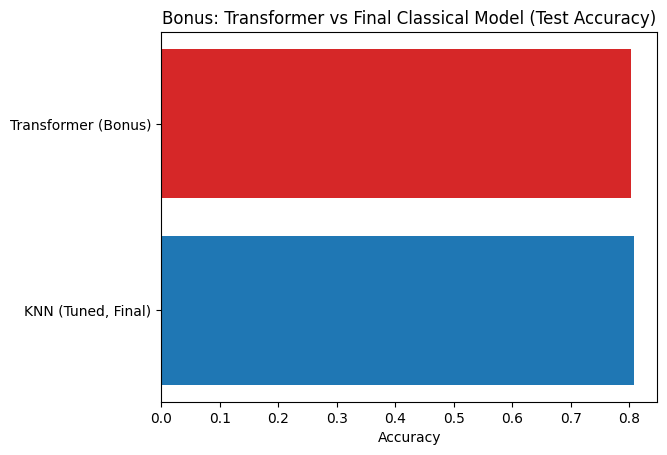

In [105]:
knn_acc = accuracy_score(y_test, y_pred_knn)

labels = ["KNN (Tuned, Final)", "Transformer (Bonus)"]
vals = [knn_acc, trans_acc]
colors = ["C0", "C3"]

plt.figure()
plt.barh(labels, vals, color=colors)
plt.xlabel("Accuracy")
plt.title("Bonus: Transformer vs Final Classical Model (Test Accuracy)")
plt.show()

Transformer achieves higher accuracy, but is not selected due to interpretability and project scope.

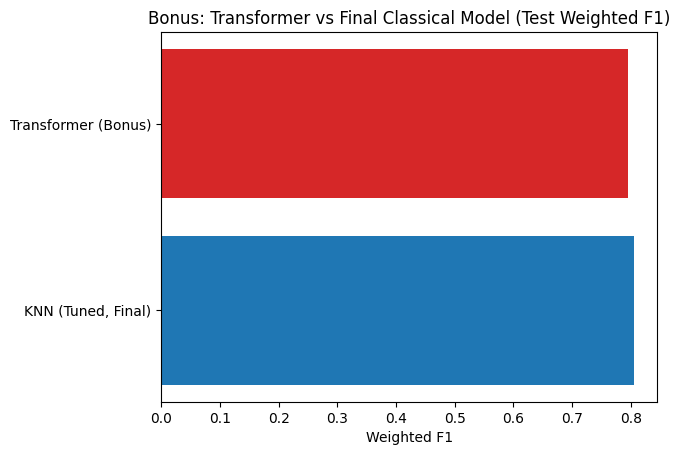

In [106]:
knn_f1 = f1_score(y_test, y_pred_knn, average="weighted")

labels = ["KNN (Tuned, Final)", "Transformer (Bonus)"]
vals = [knn_f1, trans_f1]
colors = ["C0", "C3"]

plt.figure()
plt.barh(labels, vals, color=colors)
plt.xlabel("Weighted F1")
plt.title("Bonus: Transformer vs Final Classical Model (Test Weighted F1)")
plt.show()

## Final analysis

The best model is KNN (tuned) as it achieves the highest test-set Accuracy and Weighted F1 in the comparison table.  

This indicates that KNN captures local structure in the feature space effectively for the Titanic dataset.  
While Logistic Regression shows stronger stability and interpretability, KNN is selected as the final model based on its superior test-set performance.  

The Transformer model is reported as a bonus comparison and is not considered the final selected model.